![title](../images/perceptron.png)

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [189]:
class Perceptron:
    def __init__(self, eta=0.01, nIter=50, randomState=1):
        self.eta = eta
        self.nIter = nIter
        self.randomState = randomState
        
    def fit(self, X, y):
        rng = np.random.RandomState(self.randomState)
        self.w_ = rng.normal(loc=0.0, scale=0.01, size= 1 + X.shape[1])
        
        self.errors_ = []
        for _ in range(self.nIter):
            errors = 0
            for xi, target in zip(X,y):
                updatedWeight = self.eta * (target - self.predict(xi))
                self.w_[1:] += updatedWeight * xi
                self.w_[0] += updatedWeight
                errors += int(updatedWeight != 0.0)
            self.errors_.append(errors)
            
        return self
    
    def netInput (self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        # activation function included
        return np.where(self.netInput(X) >= 0.0, 1, -1)
    def step(self, y):
        return 1 if y >=0 else -1
        

In [190]:
df = pd.read_csv('iris.data',header=None)

In [191]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [192]:
#selecting setosa = -1  and versicolor = 1
y = df.iloc[0:100,4].values
y = np.where (y== 'Iris-setosa', -1 , 1)

In [193]:
# extracting features , sepal length ,petal length
X = df.iloc[0:100,[0,2]].values

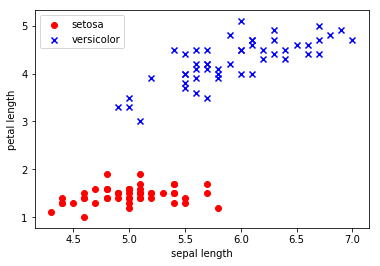

In [194]:
plt.scatter(X[:50,0], X[:50, 1],color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0], X[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

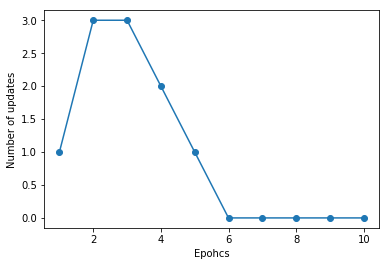

In [195]:
p = Perceptron(eta = 0.1,nIter = 10)
p.fit(X,y)
plt.plot(range(1, len(p.errors_)+1),p.errors_,marker='o')
plt.xlabel('Epohcs')
plt.ylabel('Number of updates')
plt.show()

In [196]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors =  ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
#     x1Min, x1Max = X[:, 0].min()-1, X[:, 0].max()+1
#     x2Min, x2Max = X[:, 1].min()-1, X[:, 1].max()+1
#     xx1, xx2 = np.meshgrid(np.arange(x1Min, x1Max, resolution),
#                            np.arange(x2Min, x2Max, resolution))
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')
        

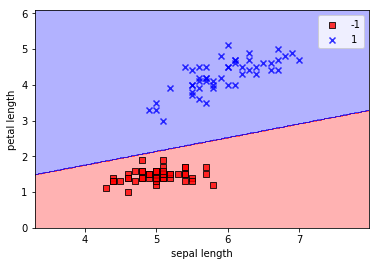

In [197]:
plot_decision_regions(X,y,classifier=p)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()
plt.show()

## Implementing Adaline 


![title](../images/adalinUpdateRule.png)


In [198]:
class AdalineGD(object):
    def __init__ (self, eta=0.01, nIter=50, randomSeed=1):
        self.eta = eta
        self.nIter=nIter
        self.randomSeed = randomSeed
        
    def fit(self, X, y):
        rng = np.random.RandomState(self.randomSeed)
        self.w_ = rng.normal(loc=0.0, scale=0.01,size= 1+X.shape[1])
        self.cost_ = []
        for i in range(self.nIter):
            netInput = self.netInput(X)
            output = self.activation(netInput)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def netInput(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.netInput(X)) >= 0.0, 1, -1)

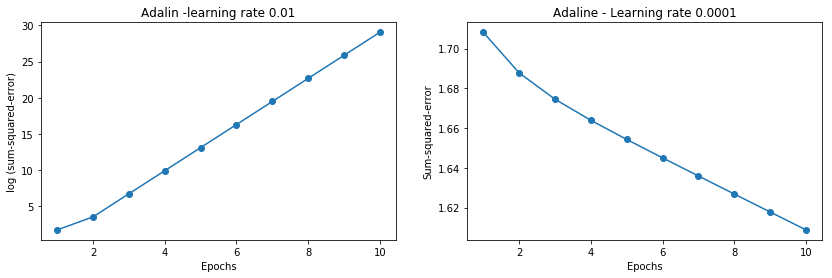

[51.081227097776221, 3212.0017330638293, 5006791.2871797914, 7811818375.78158, 12188352557082.277, 19016819254863860.0, 2.967090202540118e+19, 4.6293884124485674e+22, 7.2229813084097873e+25, 1.1269622320163609e+29]
[51.081227097776221, 48.734405003475466, 47.268121538341724, 46.127493074312461, 45.115771531419291, 44.163004705366433, 43.244135928281686, 42.350009099392544, 41.477103580234122, 40.623899946601107]


In [199]:
fig, ax = plt.subplots(nrows=1 ,ncols=2, figsize=(14,4))
ada1 = AdalineGD(nIter=10,eta=0.01).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_) + 1),
                np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log (sum-squared-error)')
ax[0].set_title('Adalin -learning rate 0.01')

ada2 = AdalineGD(nIter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),
                np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()
print(ada1.cost_)
print(ada2.cost_)

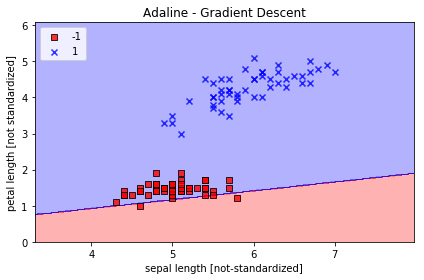

In [200]:
plot_decision_regions(X, y, classifier=ada2)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [not-standardized]')
plt.ylabel('petal length [not standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [201]:
#standaraization of  the input
X_std = np.copy(X)
X_std[:,0] = (X_std[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X_std[:,1] - X[:,1].mean()) / X[:,1].std()

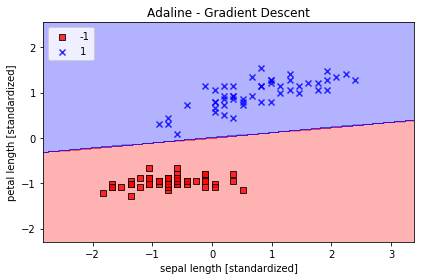

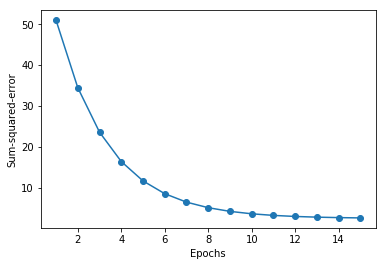

In [203]:
ada = AdalineGD(nIter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

In [226]:
class AdalineSGD(object):


    def __init__(self, eta=0.01, n_iter=10,shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X,y)
            cost = []
            for xi, target in zip(X,y):
                cost.append(self._update_weights(xi,target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    
    def partial_fit(self, X, y):
        
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        print(y.ravel())
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
            else:
                self._update_weights(X, y)
        return self
    
    
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
   
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01,size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
 
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    
    def activation(self, X):
        return X
    
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

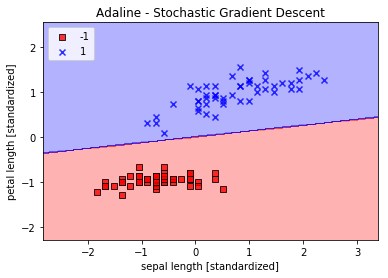

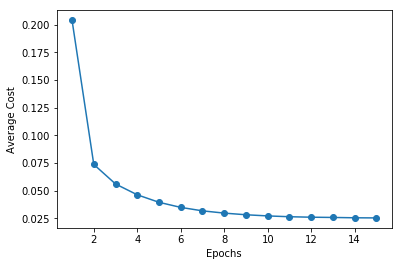

In [227]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()


plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()